In [1]:
import pandas as pd
import numpy as np

from PIL import Image
import requests
from io import BytesIO

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
import os
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [3]:
data = pd.read_csv('fifa19.csv')
del data['Unnamed: 0']
#data.set_index('ID', inplace=True)
data.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
data.shape

(18207, 88)

Давайте сначала поработаем с самой таблицей

In [5]:
pd.DataFrame(data.isna().sum()).T

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,0,0,0,0,0,0,0,241,0,0,0,0,48,48,48,48,48,48,48,60,60,1553,16943,289,48,48,2085,2085,2085,2085,2085,2085,2085,2085,2085,2085,2085,2085,2085,2085,2085,2085,2085,2085,2085,2085,2085,2085,2085,2085,2085,2085,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,1564


In [6]:
data[data.Club.fillna('Unknown') == 'Unknown']

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
452,207439,L. Paredes,24,https://cdn.sofifa.org/players/4/19/207439.png,Argentina,https://cdn.sofifa.org/flags/52.png,80,85,NaN,https://cdn.sofifa.org/flags/52.png,€0,€0,2122,Right,2.0,4.0,4.0,Medium/ Medium,Normal,No,CM,5.0,NaN,NaN,NaN,5'11,165lbs,71+2,71+2,71+2,75+2,75+2,75+2,75+2,75+2,77+2,77+2,77+2,76+2,79+2,79+2,79+2,76+2,75+2,77+2,77+2,77+2,75+2,74+2,72+2,72+2,72+2,74+2,76.0,55.0,60.0,84.0,73.0,78.0,79.0,78.0,82.0,82.0,75.0,69.0,77.0,74.0,77.0,82.0,61.0,79.0,69.0,80.0,79.0,72.0,74.0,82.0,57.0,74.0,73.0,75.0,72.0,9.0,14.0,6.0,9.0,10.0,NaN
538,156713,A. Granqvist,33,https://cdn.sofifa.org/players/4/19/156713.png,Sweden,https://cdn.sofifa.org/flags/46.png,80,80,NaN,https://cdn.sofifa.org/flags/46.png,€0,€0,1797,Right,2.0,4.0,2.0,High/ Medium,Normal,No,LCB,4.0,NaN,NaN,NaN,6'4,185lbs,62+2,62+2,62+2,56+2,58+2,58+2,58+2,56+2,58+2,58+2,58+2,57+2,64+2,64+2,64+2,57+2,68+2,74+2,74+2,74+2,68+2,70+2,79+2,79+2,79+2,70+2,49.0,51.0,81.0,73.0,37.0,49.0,36.0,40.0,67.0,63.0,46.0,49.0,55.0,76.0,36.0,74.0,64.0,67.0,83.0,59.0,81.0,82.0,54.0,49.0,79.0,78.0,82.0,83.0,79.0,7.0,9.0,12.0,10.0,15.0,NaN
568,229909,A. Lunev,26,https://cdn.sofifa.org/players/4/19/229909.png,Russia,https://cdn.sofifa.org/flags/40.png,79,81,NaN,https://cdn.sofifa.org/flags/40.png,€0,€0,1217,Right,1.0,3.0,1.0,Medium/ Medium,Normal,No,GK,12.0,NaN,NaN,NaN,6'2,176lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,14.0,17.0,25.0,13.0,15.0,18.0,17.0,32.0,17.0,58.0,54.0,36.0,76.0,50.0,24.0,60.0,27.0,70.0,13.0,26.0,20.0,11.0,63.0,15.0,69.0,18.0,20.0,12.0,80.0,73.0,65.0,77.0,85.0,NaN
677,187347,I. Smolnikov,29,https://cdn.sofifa.org/players/4/19/187347.png,Russia,https://cdn.sofifa.org/flags/40.png,79,79,NaN,https://cdn.sofifa.org/flags/40.png,€0,€0,2038,Right,2.0,3.0,3.0,High/ High,Lean,No,RB,2.0,NaN,NaN,NaN,5'10,154lbs,70+2,70+2,70+2,73+2,72+2,72+2,72+2,73+2,73+2,73+2,73+2,75+2,74+2,74+2,74+2,75+2,78+2,75+2,75+2,75+2,78+2,78+2,73+2,73+2,73+2,78+2,73.0,61.0,69.0,79.0,57.0,72.0,49.0,46.0,75.0,72.0,84.0,90.0,80.0,75.0,76.0,67.0,85.0,93.0,68.0,57.0,65.0,71.0,77.0,72.0,41.0,73.0,76.0,76.0,80.0,7.0,12.0,10.0,8.0,15.0,NaN
874,187607,A. Dzyuba,29,https://cdn.sofifa.org/players/4/19/187607.png,Russia,https://cdn.sofifa.org/flags/40.png,78,78,NaN,https://cdn.sofifa.org/flags/40.png,€0,€0,1810,Right,2.0,3.0,3.0,High/ Medium,Stocky,No,ST,22.0,NaN,NaN,NaN,6'5,201lbs,77+2,77+2,77+2,71+2,74+2,74+2,74+2,71+2,71+2,71+2,71+2,71+2,66+2,66+2,66+2,71+2,52+2,52+2,52+2,52+2,52+2,48+2,48+2,48+2,48+2,48+2,61.0,79.0,86.0,71.0,74.0,71.0,64.0,60.0,55.0,77.0,66.0,65.0,50.0,75.0,32.0,78.0,63.0,77.0,93.0,68.0,75.0,30.0,78.0,73.0,77.0,70.0,21.0,15.0,19.0,15.0,12.0,11.0,11.0,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17197,245164,V. Kaith,21,https://cdn.sofifa.org/players/4/19/245164.png,India,https://cdn.sofifa.org/flags/159.png,55,64,NaN,https://cdn.sofifa.org/flags/159.png,€0,€0,838,Right,1.0,2.0,1.0,Medium/ Medium,Normal,N

1) Начнем с пустых значений. Как человек, который считает, что хорошо разбирается в FIFA, могу заявить, что пустые значения имеются у игроков, которые вошли в базу игры, однако некоторые лиги в 2019 году не стали перезаключать контракты с EA. В таком случае EA предложила клубам заключить контракты напрямую. Тем не менее, некоторые клубы отказались. Одним из таких примеров, например, оказался ```Зенит```, чьих игроков мы можем наблюдать в выдаче запроса.

Иная ситуация - игроки некоторых лиг добавлены в базу, но пока что не введены в игру. Например, Индийская лига появилась, если мне не изменяет память, уже в FIFA 20.

По моему мнению, мы можем спокойно удалить эти столбцы

In [7]:
data[data.Position == 'GK'].head(10)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,€68M,€94K,1331,Right,3.0,3.0,1.0,Medium/ Medium,Normal,Yes,GK,1.0,"Jul 16, 2014",NaN,2021,6'2,192lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,11.0,15.0,29.0,13.0,12.0,13.0,14.0,26.0,16.0,43.0,60.0,67.0,86.0,49.0,22.0,76.0,41.0,78.0,12.0,34.0,19.0,11.0,70.0,11.0,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M
18,192448,M. ter Stegen,26,https://cdn.sofifa.org/players/4/19/192448.png,Germany,https://cdn.sofifa.org/flags/21.png,89,92,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€58M,€240K,1328,Right,3.0,4.0,1.0,Medium/ Medium,Normal,Yes,GK,22.0,"Jul 1, 2014",NaN,2022,6'2,187lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,14.0,11.0,36.0,14.0,17.0,18.0,12.0,42.0,18.0,38.0,50.0,37.0,85.0,43.0,22.0,79.0,35.0,79.0,10.0,43.0,22.0,11.0,69.0,25.0,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0,€123.3M
19,192119,T. Courtois,26,https://cdn.sofifa.org/players/4/19/192119.png,Belgium,https://cdn.sofifa.org/flags/7.png,89,90,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,€53.5M,€240K,1311,Left,4.0,2.0,1.0,Medium/ Medium,Courtois,Yes,GK,1.0,"Aug 9, 2018",NaN,2024,6'6,212lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,13.0,33.0,12.0,13.0,19.0,20.0,35.0,23.0,46.0,52.0,61.0,84.0,45.0,36.0,68.0,38.0,70.0,17.0,23.0,15.0,13.0,44.0,27.0,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,€113.7M
22,167495,M. Neuer,32,https://cdn.sofifa.org/players/4/19/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,89,89,FC Bayern München,https://cdn.sofifa.org/teams/2/light/21.png,€38M,€130K,1473,Right,5.0,4.0,1.0,Medium/ Medium,Normal,Yes,GK,1.0,"Jul 1, 2011",NaN,2021,6'4,203lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,13.0,25.0,55.0,11.0,30.0,14.0,11.0,59.0,48.0,54.0,60.0,51.0,84.0,35.0,25.0,77.0,43.0,80.0,16.0,29.0,30.0,12.0,70.0,47.0,70.0,17.0,10.0,11.0,90.0,86.0,91.0,87.0,87.0,€62.7M
37,167948,H. Lloris,31,https://cdn.sofifa.org/players/4/19/167948.png,France,https://cdn.sofifa.org/flags/18.png,88,88,Tottenham Hotspur,https://cdn.sofifa.org/teams/2/light/18.png,€36M,€150K,1335,Left,4.0,1.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Aug 1, 2012",NaN,2022,6'2,181lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,10.0,10.0,50.0,11.0,10.0,11.0,10.0,50.0,34.0,65.0,62.0,55.0,85.0,54.0,23.0,74.

Другая ситуация с пустыми значениями на позициях. Как можно заметить, игроки, выданные по запросу, все являются вратарями. Необходимо придумать, чем заполнить данные столбцы, или же вообще от них избавиться в целом.

In [8]:
Messi = 158023
De_Bruyne = 192985

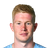

In [8]:
url = data.loc[4, 'Photo']
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

3) Интересным дополнением являются ссылки на картинки игроков, флагов и клубов. Смысловой нагрузки они никакой не несут, поэтому можно от них избавиться

In [179]:
df = data.copy()

In [180]:
df.columns = [i.replace(' ', '') for i in df.columns]

4) В FIFA из года в год почти идентичные правила определения рейтинга на позициях. Например, на позициях ```LCM, CM и RCM``` игрок всегда будет иметь одинаковый рейтинг. Поэтому нет смысла содержать все подобные столбцы. Однако, надо быть внимательнее, потому что не для всех позиций действует такой хинт и не для всех платформ одинаковое правило

Как можно заметить, здесь фланги не влияют, поэтому совпадений должно быть больше

In [216]:
# 1) Редактирование нагрузки в игре
atte=[]
defe=[]
for i in range(len(df)):
    try:
        a = df.loc[i, 'WorkRate'].split('/')
        atte.append(a[0])
        defe.append(a[1].strip(' '))
    except:
        # нулевые значения
        atte.append(df.loc[i, 'WorkRate'])
        defe.append(df.loc[i, 'WorkRate'])
        
df['AttWorkRate'] = atte
df['DefWorkRate'] = defe

df['AttWorkRate'] = df['AttWorkRate'].map({'High': 3, 'Medium': 2, 'Low': 1})
df['DefWorkRate'] = df['DefWorkRate'].map({'High': 3, 'Medium': 2, 'Low': 1})
df.drop(['WorkRate'], axis=1, inplace=True)

print('stage 1 passed')

# 2) Приведение стоимостей в необходимый вид
df.Wage = df.Wage.str.replace("€","")
df.Wage = df.Wage.str.replace("K","000").astype("float")
df['WageThousand'] = df.Wage / 1000

df['ValueThousand'] = df.Value.str.replace("€","")
df['ValueThousand'] = df['ValueThousand'].str.replace("K","")
df['ValueThousand'] = df['ValueThousand'].str.replace("M","")
df['ValueThousand'] = df['ValueThousand'].astype("float")
for i in range(len(df)):
    if 'M' in str(df.loc[i, 'Value']):
        df.loc[i, 'ValueThousand'] = df.loc[i, 'ValueThousand'] * 1000

df['ReleaseClauseThousand'] = df['ReleaseClause'].str.strip('€KM').astype(float)
for i in range(len(df)):
    if 'M' in str(df.loc[i, 'ReleaseClause']):
        df.loc[i, 'ReleaseClauseThousand'] = df.loc[i, 'ReleaseClauseThousand'] * 1000

df.drop(['Value', 'Wage', 'ReleaseClause'], axis=1, inplace=True)

print('stage 2 passed')

# 3) Удаление пустых значений
df.drop(['Photo', 'Flag', 'ClubLogo'], axis=1, inplace=True)
df = df[(df['PreferredFoot'].fillna('Unknown') != 'Unknown') \
        & (df['Club'].fillna('Unknown') != 'Unknown') & (df['Position'].fillna('Unknown') != 'Unknown')]

print('stage 3 passed')

# 4) Удаление идентичных столбцов
df.drop(['LS', 'RS', 'LW', 'LM', 'LB', 'LF', 'RF', 'LAM', 'RAM', 'LCM', 'RCM', 'LWB', 'LDM', 'RDM', 'LCB', 'RCB'], axis=1, inplace=True)

print('stage 4 passed')

# 5) Преобразование рейтингов на каждой позиции
pos_index = df.loc[0, 'ST': 'RB'].index
for pos in pos_index:
    for i in range(len(df)):
        try:
            df.loc[i, pos] =  int(int(df.loc[i, pos][0:2]) + 2)
        except:
            continue

print('stage 5 passed')

# 4) Редактирование роста и веса
df.Weight = df.Weight.str.replace("lbs","").astype("float")
df['WeightKG'] = round(df['Weight'] / 2.205, 0)

ft_ =[]
in_ =[]
for i in range(len(df)):
    ft_.append(df['Height'].fillna("0'0").str.split("'")[i][0])
    in_.append(df['Height'].fillna("0'0").str.split("'")[i][1])

df['ft'] = ft_
df['in'] = in_
for i in range(len(df)):
    df.loc[i, 'ft'] = int(df.loc[i, 'ft'])
    df.loc[i, 'in'] = int(df.loc[i, 'in'])


df['HeightCM'] = round((df['ft'] * 12 + df['in']) * 2.54, 0)

df.drop(['Weight', 'Height', 'ft', 'in'], axis=1, inplace=True)

print('stage 6 passed')



# Прочие изменения
df['RealFace'] = df['RealFace'].map({'Yes': 1, 'No': 0})
df.ReleaseClauseThousand = df.ReleaseClauseThousand.fillna(0)
df.PreferredFoot = df.PreferredFoot.map({'Left': 0, 'Right': 1})
df.loc[:,'ST': "RB"] = df.loc[:,'ST': "RB"].fillna(0)
df.drop(['Joined', 'LoanedFrom', 'ContractValidUntil'], axis=1, inplace=True)


print('success!')

stage 1 passed
stage 6 passed
stage 2 passed
stage 3 passed


C:\Program Files (x86)\Soft data analyst\Anaconda\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Program Files (x86)\Soft data analyst\Anaconda\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


stage 4 passed
stage 5 passed


C:\Program Files (x86)\Soft data analyst\Anaconda\lib\site-packages\ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Program Files (x86)\Soft data analyst\Anaconda\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


success!


In [219]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,BodyType,RealFace,Position,JerseyNumber,ST,CF,RW,CAM,CM,RM,CDM,RWB,CB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,HeightCM,WeightKG,AttWorkRate,DefWorkRate,WageThousand,ValueThousand,ReleaseClauseThousand
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,2202,0,5.0,4.0,4.0,Messi,1,RF,10.0,90,95,94,95,86,93,63,66,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,170.0,72.0,2.0,2.0,565.0,110500.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,2228,1,5.0,4.0,5.0,C. Ronaldo,1,ST,7.0,93,92,91,90,83,90,63,67,55,63,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,188.0,83.0,3.0,1.0,405.0,77000.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,2143,1,5.0,5.0,5.0,Neymar,1,LW,10.0,86,91,91,91,83,90,62,67,49,62,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,175.0,68.0,3.0,2.0,290.0,118500.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,1471,1,4.0,3.0,1.0,Lean,1,GK,1.0,0,0,0,0,0,0,0,0,0,0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,193.0,76.0,2.0,2.0,260.0,72000.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,2281,1,4.0,5.0,4.0,Normal,1,RCM,7.0,84,89,89,90,89,90,79,79,68,75,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,180.0,70.0,3.0,3.0,355.0,102000.0,196400.0


In [220]:
#checkpoint
df.to_csv('df.csv', index=False)
# df = pd.read_csv('df.csv')

In [223]:
pd.DataFrame(df.isna().sum()).T

,ID,Name,Age,Nationality,Overall,Potential,Club,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,BodyType,RealFace,Position,JerseyNumber,ST,CF,RW,CAM,CM,RM,CDM,RWB,CB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,HeightCM,WeightKG,AttWorkRate,DefWorkRate,WageThousand,ValueThousand,ReleaseClauseThousand
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [224]:
df.describe()

,ID,Age,Overall,Potential,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,RealFace,JerseyNumber,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,HeightCM,WeightKG,AttWorkRate,DefWorkRate,WageThousand,ValueThousand,ReleaseClauseThousand
count,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.00000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000
mean,214225.713472,25.105257,66.236801,71.329334,1598.111731,0.767720,1.113908,2.947260,2.362875,0.092309,19.643041,49.748856,45.581147,52.295290,58.713417,42.932135,55.411207,47.215816,42.882018,52.724300,58.411151,64.601518,64.720672,63.523384,61.820516,63.962384,55.490512,65.116475,63.205994,65.323697,47.130316,55.879060,46.690870,49.995758,53.448934,48.544480,58.655263,47.264092,47.684005,45.643208,16.590356,16.367675,16.205659,16.360308,16.68367,181.179373,75.284239,2.218495,2.086059,9.883748,2448.628753,4258.799531
std,30042.543245,4.675372,6.929243,6.144098,272.983157,0.422299,0.395495,0.660106,0.756309,0.289470,16.008322,18.354989,19.512533,17.367823,14.680340,17.688194,18.904436,18.389442,17.483142,15.311376,16.665568,14.947197,14.666098,14.768421,9.024412,14.149768,17.215926,11.836960,15.892897,12.552242,19.251517,17.354347,20.691841,19.521104,14.119193,15.691563,11.420965,19.874746,21.647674,21.270735,17.661697,16.877771,16.468529,16.992206,17.91613,6.691920,7.080610,0.521759,0.502786,22.142769,5631.804209,10780.447353
min,16.000000,16.000000,46.000000,48.000000,731.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.00000,155.000000,50.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,200235.250000,21.000000,62.000000,67.000000,1457.000000,1.000000,1.000000,3.000000,2.000000,0.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,39.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.00000,175.000000,70.000000,2.000000,2.000000,1.000000,325.000000,419.000000
50%,221701.500000,25.000000,66.000000,71.000000,1636.000000,1.000000,1.000000,3.000000,2.000000,0.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,49.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.00000,180.000000,75.000000,2.000000,2.000000,3.000000,700.000000,1000.000000
75%,236508.750000,28.000000,71.000000,75.000000,1787.000000,1.000000,1.000000,3.000000,3.000000,0.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,6

In [281]:
df.corr()['ValueThousand'].sort_values(ascending=False)

ValueThousand              1.000000
ReleaseClauseThousand      0.967179
WageThousand               0.858030
ClubValueT                 0.657420
InternationalReputation    0.655187
Overall                    0.631395
Potential                  0.579482
Reactions                  0.544791
Composure                  0.454276
RealFace                   0.442939
Special                    0.380310
Vision                     0.359716
ShortPassing               0.329873
SkillMoves                 0.317204
BallControl                0.310583
LongPassing                0.304559
Volleys                    0.290073
Curve                      0.288550
ShotPower                  0.283195
LongShots                  0.281630
Dribbling                  0.273332
FKAccuracy                 0.267354
Positioning                0.260733
Finishing                  0.258212
Crossing                   0.251558
Penalties                  0.241243
CAM                        0.239965
CM                         0

In [239]:
df.head(3)

,ID,Name,Age,Nationality,Overall,Potential,Club,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,BodyType,RealFace,Position,JerseyNumber,ST,CF,RW,CAM,CM,RM,CDM,RWB,CB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,HeightCM,WeightKG,AttWorkRate,DefWorkRate,WageThousand,ValueThousand,ReleaseClauseThousand
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,2202,0,5.0,4.0,4.0,Messi,1,RF,10.0,90,95,94,95,86,93,63,66,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,170.0,72.0,2.0,2.0,565.0,110500.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,2228,1,5.0,4.0,5.0,C. Ronaldo,1,ST,7.0,93,92,91,90,83,90,63,67,55,63,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,188.0,83.0,3.0,1.0,405.0,77000.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,2143,1,5.0,5.0,5.0,Neymar,1,LW,10.0,86,91,91,91,83,90,62,67,49,62,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,175.0,68.0,3.0,2.0,290.0,118500.0,228100.0


In [263]:
clubvalue = pd.DataFrame(df.groupby('Club').sum()['ValueThousand'].sort_values(ascending=False)).reset_index()
clubvalue.columns = ['Club', 'ClubValueT']
clubvalue.head()

,Club,ClubValueT
0,Real Madrid,874425.0
1,FC Barcelona,852600.0
2,Manchester City,786555.0
3,Juventus,704475.0
4,FC Bayern München,679025.0


In [261]:
df = df.merge(clubvalue, how='left', on='Club')

# LDA

In [347]:
df_lda = df.drop(['ID', 'Name', 'Nationality', 'Club', 'Special', 'BodyType'], axis=1)

In [348]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_lda.Position = le.fit_transform(df_lda.Position)

In [349]:
df_lda.columns

Index(['Age', 'Overall', 'Potential', 'PreferredFoot',
       'InternationalReputation', 'WeakFoot', 'SkillMoves', 'RealFace',
       'Position', 'JerseyNumber', 'ST', 'CF', 'RW', 'CAM', 'CM', 'RM', 'CDM',
       'RWB', 'CB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'HeightCM', 'WeightKG', 'AttWorkRate', 'DefWorkRate', 'WageThousand',
       'ValueThousand', 'ReleaseClauseThousand', 'ClubValueT'],
      dtype='object')

In [350]:
df_lda_with_pos = df_lda.copy()
df_lda.drop(['ST', 'CF', 'RW', 'CAM', 'CM', 'RM', 'CDM',
       'RWB', 'CB', 'RB'], axis=1, inplace=True)

In [351]:
X = df_lda.drop('ValueThousand', axis=1)
y = df_lda.ValueThousand

In [352]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_norm = sc.fit_transform(X)

In [353]:
X_norm

array([[ 1.2608425 ,  4.00678288,  3.68993143, ..., 25.07056562,
        20.61578662,  6.82660598],
       [ 1.68862793,  4.00678288,  3.68993143, ..., 17.84452876,
        11.39513273,  5.53259659],
       [ 0.19137895,  3.71814303,  3.52716906, ..., 12.65081476,
        20.76420761,  4.84114786],
       ...,
       [-1.94754817, -2.77625373, -0.70465261, ..., -0.40121432,
        -0.37975361, -0.57932098],
       [-1.73365546, -2.77625373, -0.86741498, ..., -0.40121432,
        -0.3817944 , -0.57351159],
       [-1.94754817, -2.92057366, -0.86741498, ..., -0.40121432,
        -0.37975361, -0.57351159]])

In [354]:
X_norm = pd.DataFrame(X_norm, columns = X.columns)
X_norm.head(3)

,Age,Overall,Potential,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,RealFace,Position,JerseyNumber,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,HeightCM,WeightKG,AttWorkRate,DefWorkRate,WageThousand,ReleaseClauseThousand,ClubValueT
0,1.260843,4.006783,3.689931,-1.818005,9.826163,1.594849,2.164684,3.135782,1.094967,-0.602394,1.866092,2.532743,1.019426,2.131249,2.434905,2.200010,2.489769,2.923926,2.238640,2.255543,1.766165,1.450960,1.860550,3.676739,2.193568,1.714129,0.243610,0.553345,-0.503804,2.434665,-0.454023,-1.193299,2.254251,2.872133,1.686018,3.269932,-0.717719,-0.909315,-0.923511,-0.599640,-0.318041,-0.073212,-0.138909,-0.484698,-1.670624,-0.463849,-0.418778,-0.171169,25.070566,20.615787,6.826606
1,1.688628,4.006783,3.689931,0.550054,9.826163,1.594849,3.486932,3.135782,1.662829,-0.789801,1.866092,2.481492,2.113433,1.518167,2.491441,1.723918,1.837202,1.894334,1.585512,2.135531,1.632357,1.791892,1.589694,3.787553,0.426706,2.295002,2.524665,1.560112,1.089581,2.382719,0.410337,-0.854992,2.305479,2.022202,2.323321,3.182371,-0.969302,-0.770728,-1.064554,-0.543018,-0.318041,-0.073212,-0.138909,-0.317246,1.019262,1.089733,1.497868,-2.160144,17.844529,11.395133,5.532597
2,0.191379,3.718143,3.527169,0.550054,9.826163,3.109798,3.486932,3.135782,0.299961,-0.602394,1.593679,2.122739,0.558791,1.722527,2.321832,2.147111,2.217866,2.523529,1.650825,2.195537,1.966877,1.723705,2.199119,3.565926,1.416149,1.423692,-0.347774,1.119651,-1.300497,1.811320,0.006969,-0.516685,1.998111,2.376340,2.068400,3.094811,-1.019618,-1.094097,-0.594411,-0.429776,-0.436543,-0.073212,-0.080057,-0.317246,-0.923434,-1.028787,1.497868,-0.171169,12.650815,20.764208,4.841148


In [366]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_norm, y)

LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [367]:
lda.explained_variance_ratio_

array([0.8304769 , 0.15009972])

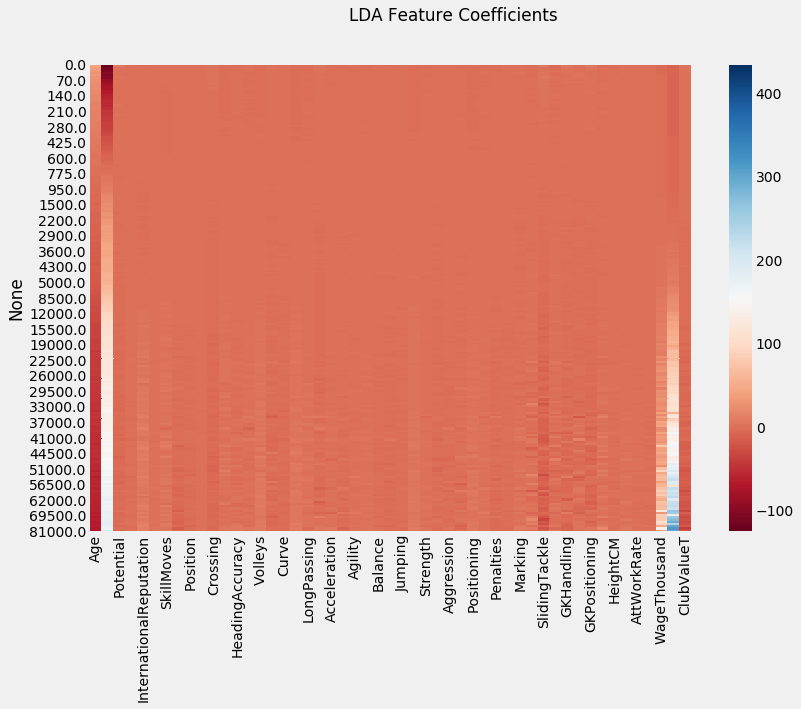

In [368]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.heatmap(pd.DataFrame(lda.coef_, 
                         columns=df_lda.drop('ValueThousand', axis=1).columns, 
                         index=[lda.classes_]), 
            ax=ax, cmap='RdBu', annot=False)

plt.suptitle('LDA Feature Coefficients')
pass

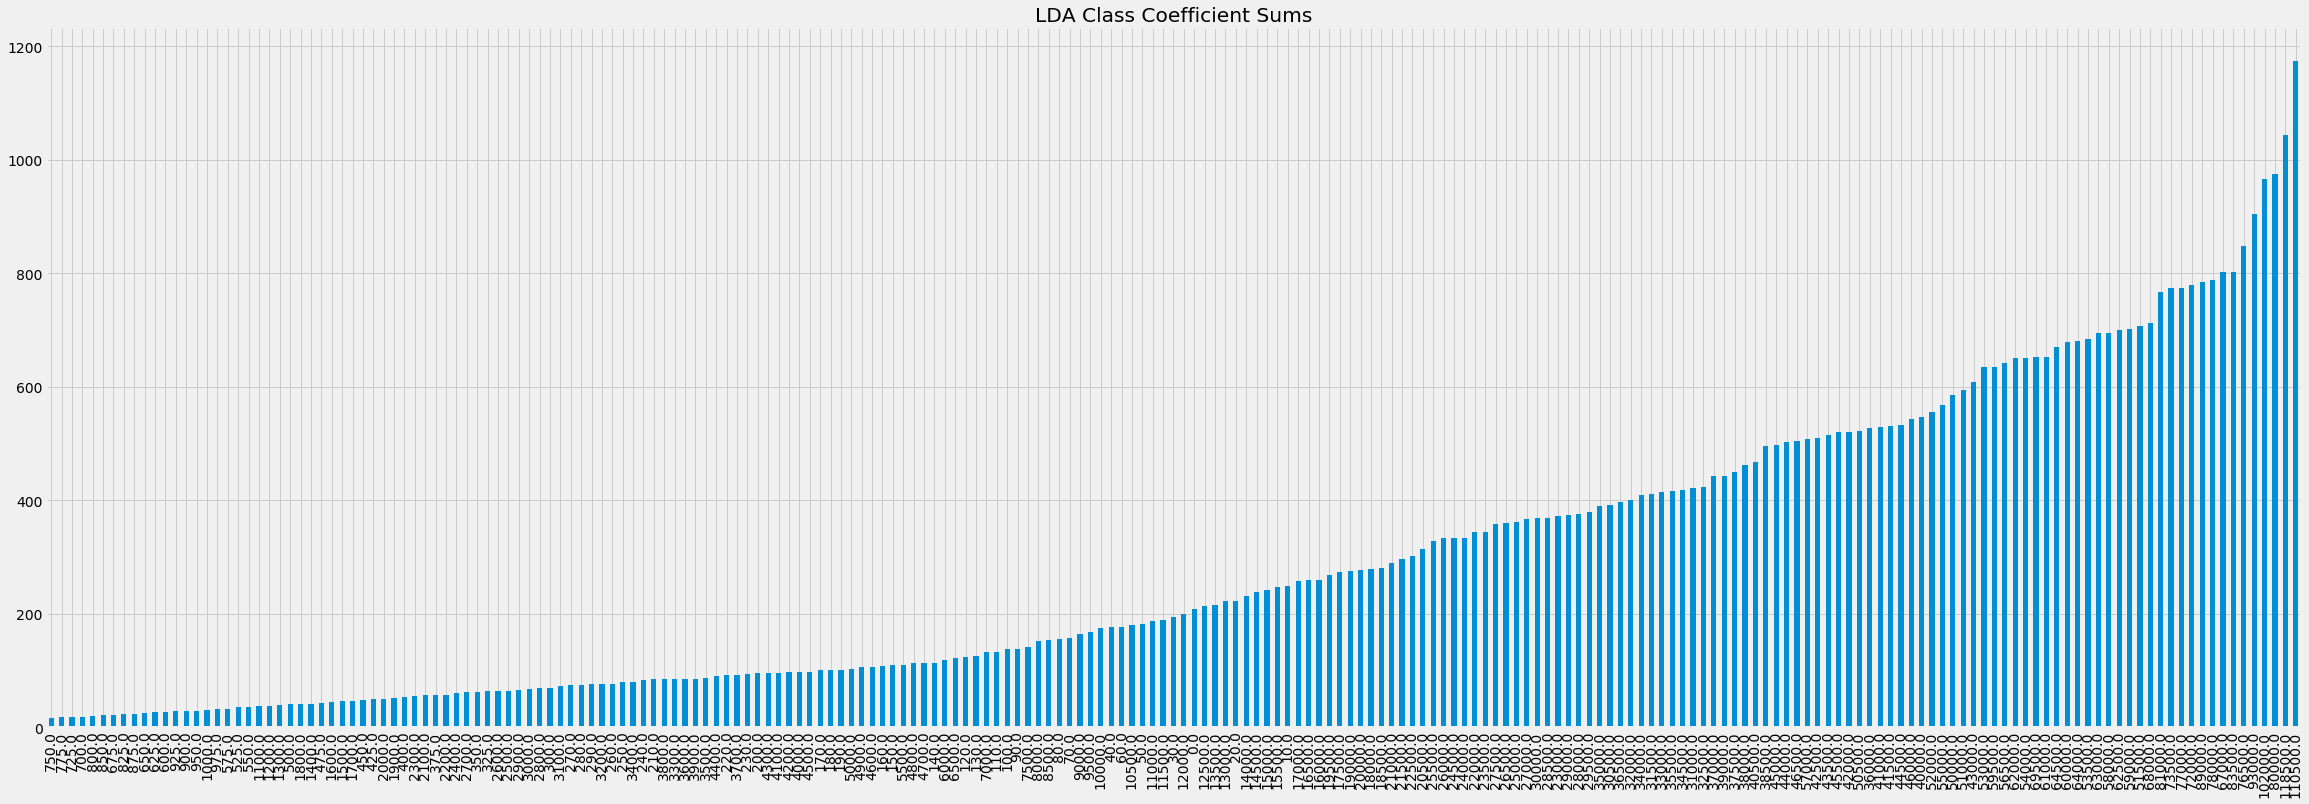

In [369]:
pd.Series(np.abs(lda.coef_).sum(axis=1), index=lda.classes_).sort_values().plot.bar(
    figsize=(36, 12), title="LDA Class Coefficient Sums"
)

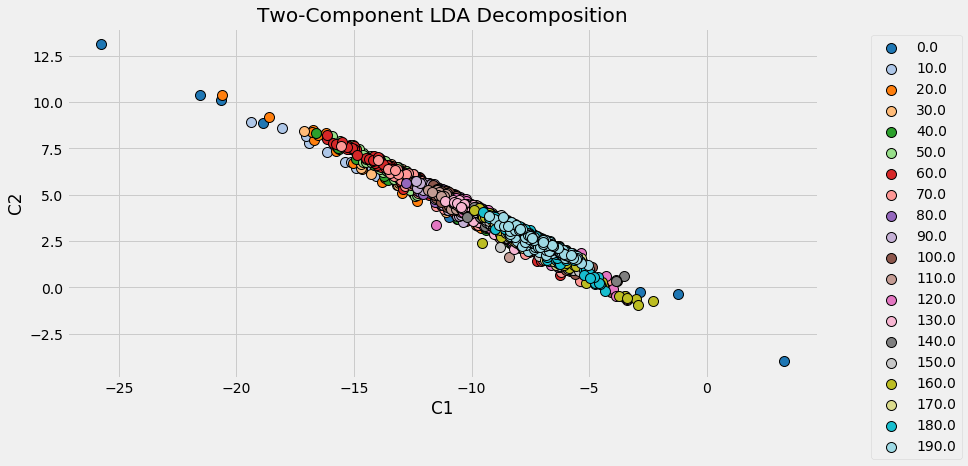

In [370]:
X_hat = lda.fit_transform(X, y)

import matplotlib as mpl

colors = mpl.cm.get_cmap(name='tab20').colors
categories = pd.Categorical(pd.Series(y)).categories
ret = pd.DataFrame(
    {'C1': X_hat[:, 0], 'C2': X_hat[:, 1], 'Type': pd.Categorical(pd.Series(y))}
)

fig, ax = plt.subplots(1, figsize=(12, 6))

for col, cat in zip(colors, categories):
    (ret
         .query('Type == @cat')
         .plot.scatter(x='C1', y='C2', color=col, label=cat, ax=ax,
                       s=100, edgecolor='black', linewidth=1,
                       title='Two-Component LDA Decomposition')
         .legend(bbox_to_anchor=(1.2, 1))
    )